In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm import tqdm_notebook
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
import os
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

In [6]:
import os
from tqdm import tqdm
BASE_DIR = r"C:\Users\APEX\Downloads\archive (10)\UTKFace"  

Age = []
Gender = []
image_paths = []

for filename in tqdm(os.listdir(BASE_DIR)):
    image_path = os.path.join(BASE_DIR, filename)
    temp = filename.split('_')
    age = int(temp[0])
    gender = int(temp[1])
    Age.append(age)
    Gender.append(gender)
    image_paths.append(image_path)


100%|█████████████████████████████████████████████████████████████████████████| 23708/23708 [00:00<00:00, 94648.04it/s]


In [7]:
## Converting into Data Frame
df= pd.DataFrame()
df['image'],df['Age'],df['Gender']= image_paths,Age,Gender
df.head(15)

image  Age  Gender
0   C:\Users\APEX\Downloads\archive (10)\UTKFace\1...  100       0
1   C:\Users\APEX\Downloads\archive (10)\UTKFace\1...  100       0
2   C:\Users\APEX\Downloads\archive (10)\UTKFace\1...  100       1
3   C:\Users\APEX\Downloads\archive (10)\UTKFace\1...  100       1
4   C:\Users\APEX\Downloads\archive (10)\UTKFace\1...  100       1
5   C:\Users\APEX\Downloads\archive (10)\UTKFace\1...  100       1
6   C:\Users\APEX\Downloads\archive (10)\UTKFace\1...  100       1
7   C:\Users\APEX\Downloads\archive (10)\UTKFace\1...  100       1
8   C:\Users\APEX\Downloads\archive (10)\UTKFace\1...  100       1
9   C:\Users\APEX\Downloads\archive (10)\UTKFace\1...  100       1
10  C:\Users\APEX\Downloads\archive (10)\UTKFace\1...  100       1
11  C:\Users\APEX\Downloads\archive (10)\UTKFace\1...  101       0
12  C:\Users\APEX\Downloads\archive (10)\UTKFace\1...  101       1
13  C:\Users\APEX\Downloads\archive (10)\UTKFace\1...  103       0
14  C:\Users\APEX\Downloads\archive (10)\UTKFace\1...  105       0

In [8]:
Gender= {0:'Male',1:'Female'}

<AxesSubplot: xlabel='Age', ylabel='Density'>

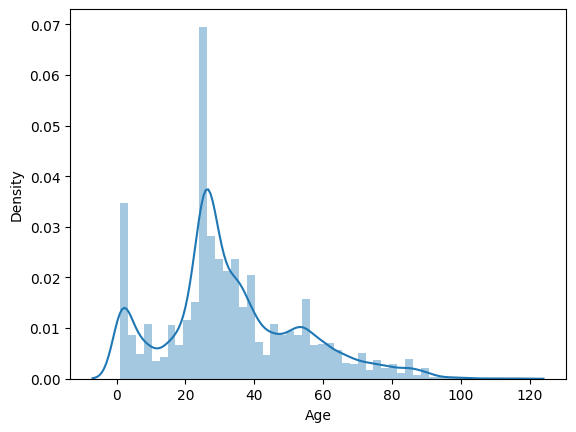

In [9]:
import seaborn as sns
sns.distplot(df["Age"])

<AxesSubplot: xlabel='Gender', ylabel='count'>

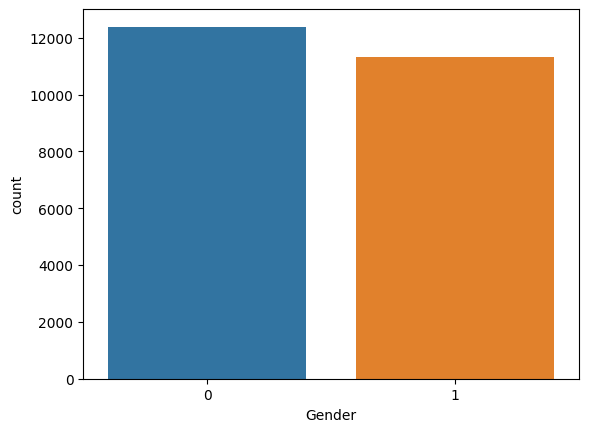

In [10]:
import seaborn as sns

sns.countplot(x="Gender", data=df)


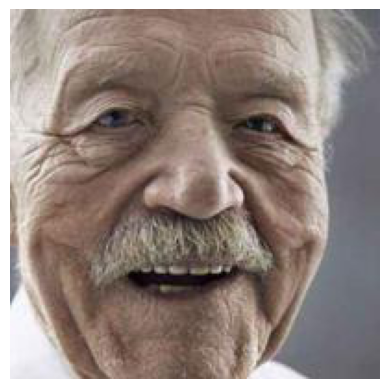

In [11]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open(df['image'][0])
plt.axis('off')
plt.imshow(img)
plt.show()


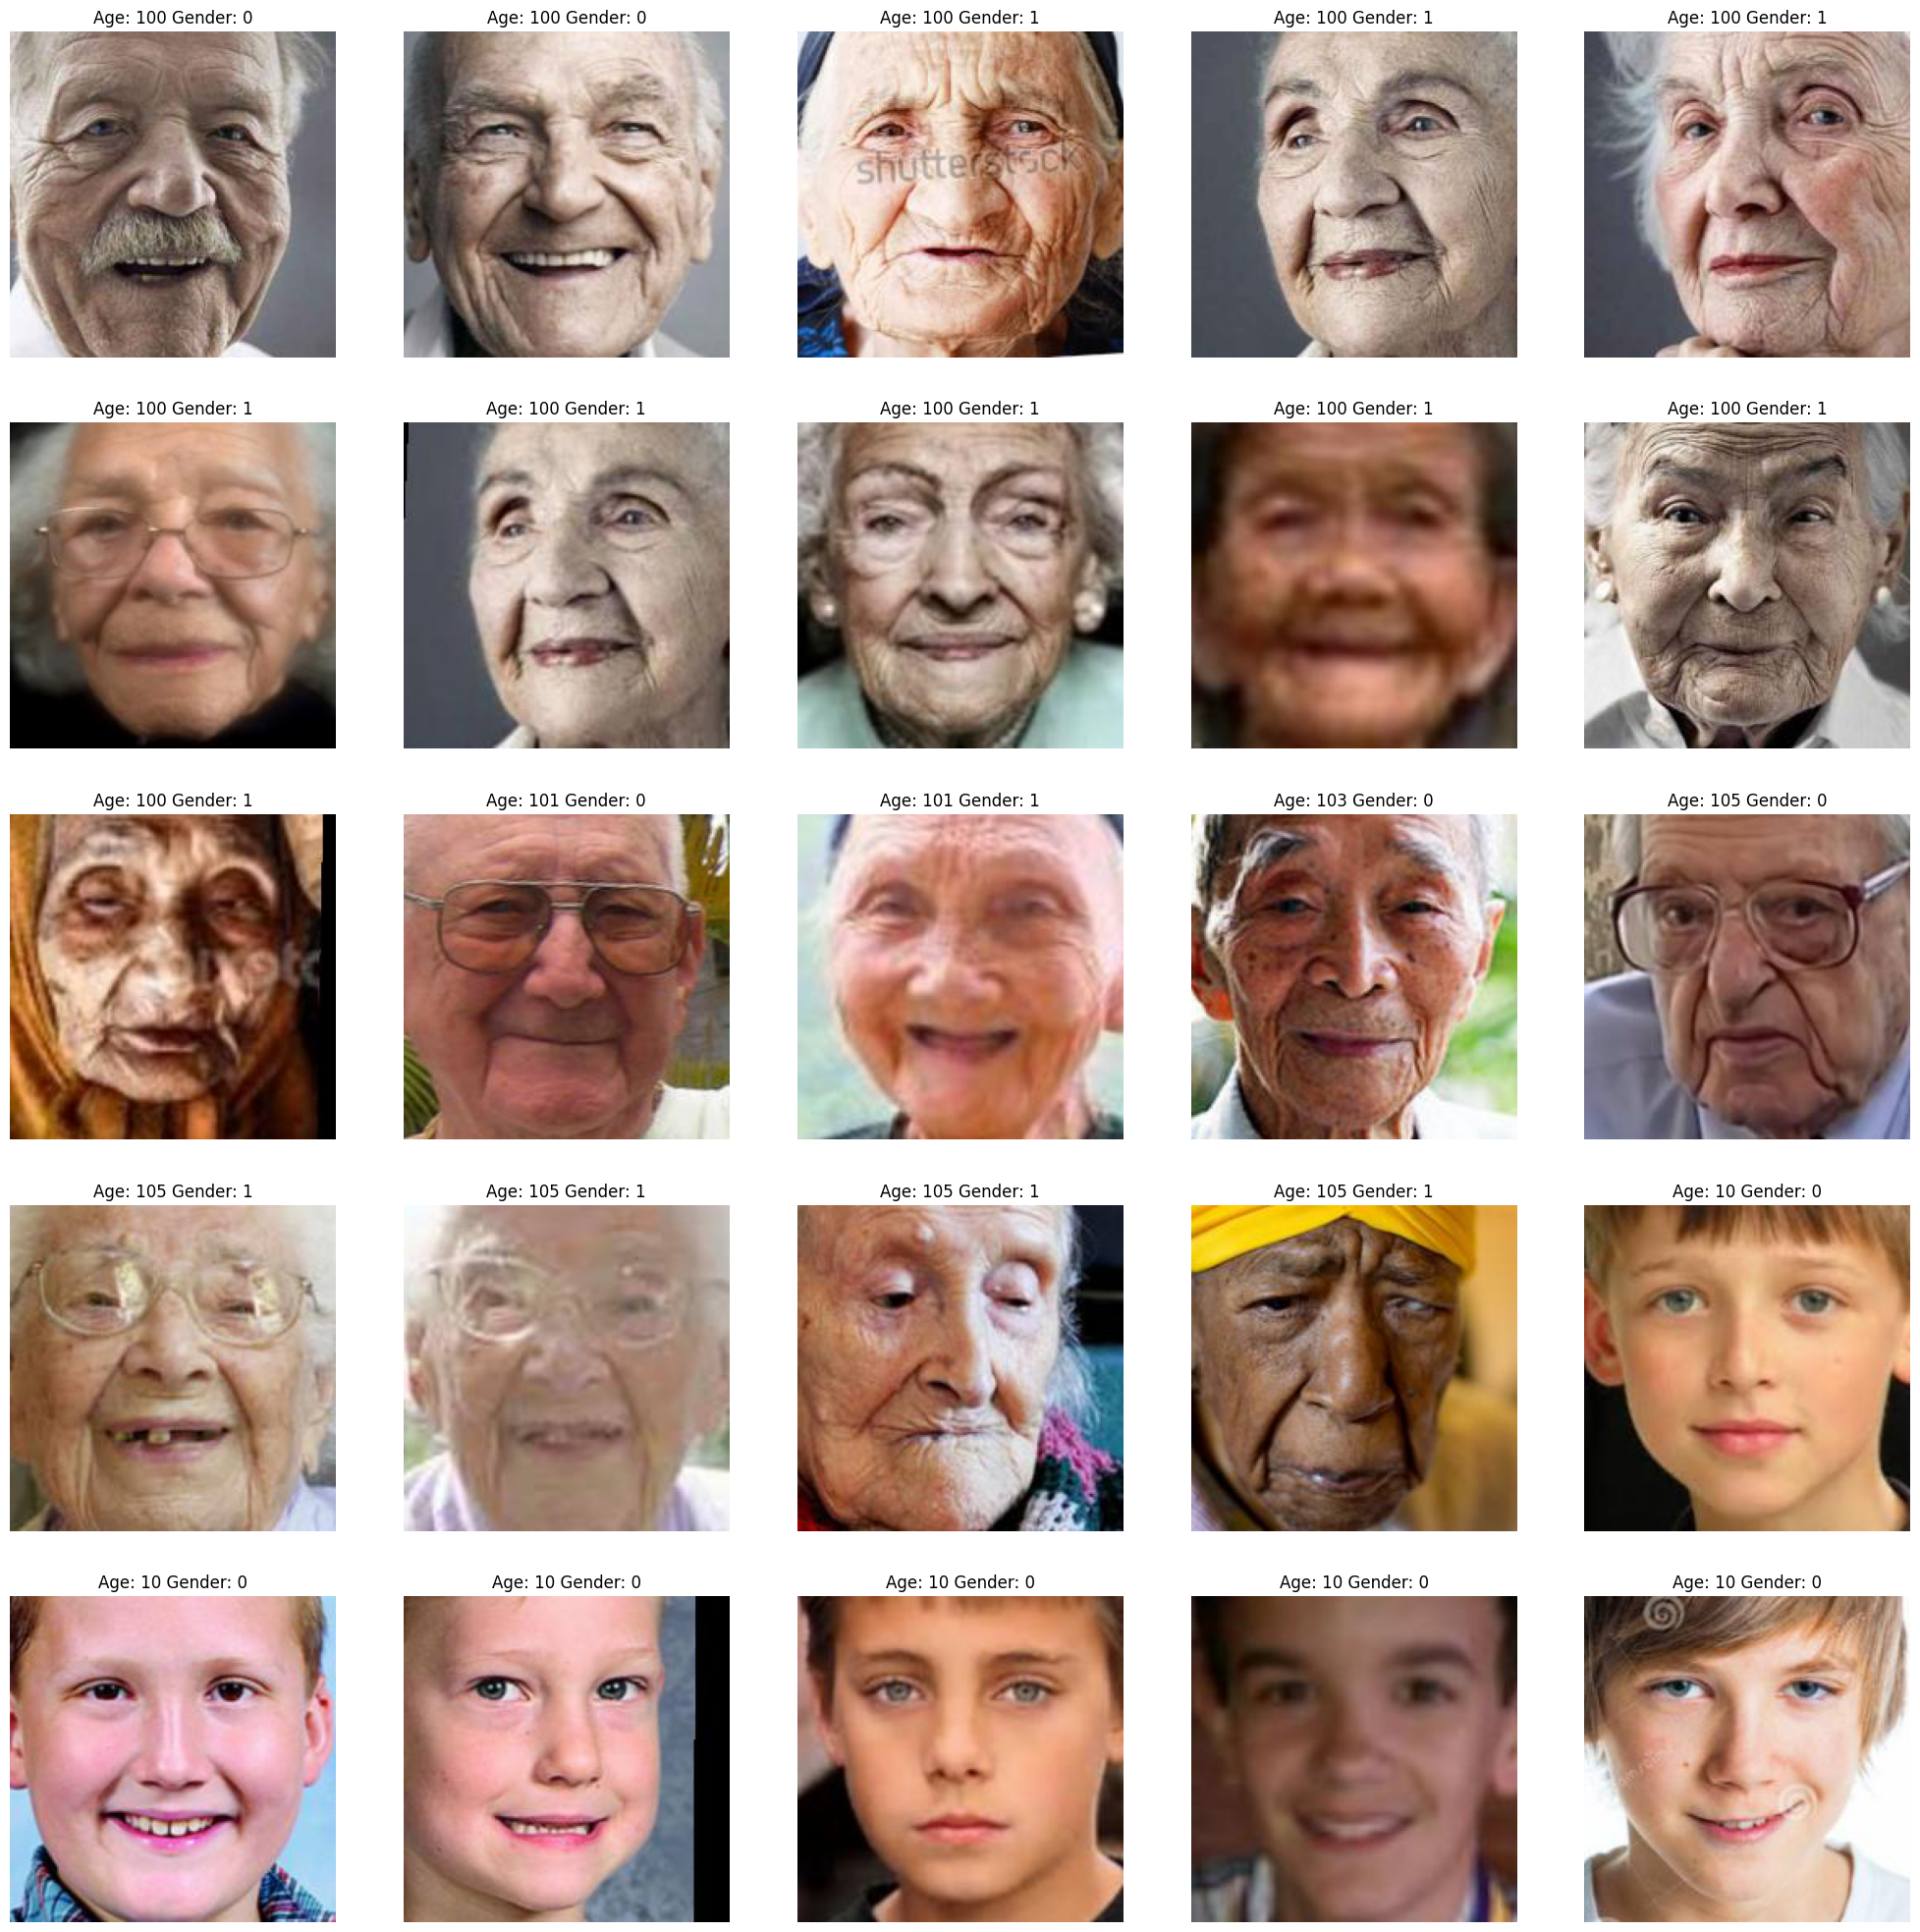

In [12]:
import matplotlib.pyplot as plt
from PIL import Image

plt.figure(figsize=(25, 25))
files = df.iloc[0:25]

for index, (file, age, gender) in files.iterrows():
    plt.subplot(5, 5, index + 1)
    img = Image.open(file)  
    img = np.array(img)
    plt.title(f"Age: {age} Gender: {gender}")
    plt.axis('off')
    plt.imshow(img)

plt.show()

### Feature Extraction

In [13]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = img.resize((128, 128), resample=Image.BILINEAR) 
        IMG = np.array(img)
        features.append(IMG)
    features = np.array(features)
    features= (features.reshape(len(features), 128,128,1))
    return features

In [14]:
x = extract_features(df['image'])

100%|████████████████████████████████████████████████████████████████████████████| 23708/23708 [07:10<00:00, 55.10it/s]


In [15]:
x.shape

(23708, 128, 128, 1)

In [16]:
x= x/255.0

In [46]:
y_gender= np.array(df['Gender'])
y_age= np.array(df['Age'])

In [18]:
input_shape=(128,128,1)

### Model Creation

In [19]:
inputs= Input((input_shape))
conv_1= Conv2D(32, kernel_size=(3,3), activation="relu")(inputs)
maxp_1= MaxPooling2D(pool_size=(2,2))(conv_1)
conv_2= Conv2D(64, kernel_size=(3,3), activation="relu")(inputs)
maxp_2= MaxPooling2D(pool_size=(2,2))(conv_1)
conv_3= Conv2D(128, kernel_size=(3,3), activation="relu")(inputs)
maxp_3= MaxPooling2D(pool_size=(2,2))(conv_1)
conv_4= Conv2D(256, kernel_size=(3,3), activation="relu")(inputs)
maxp_4= MaxPooling2D(pool_size=(2,2))(conv_1)

flatten= Flatten()(maxp_4)

# fully connected layer

dense_1 = Dense(256,activation='relu')(flatten)
dense_2 = Dense(256,activation='relu')(flatten)

dropout_1=Dropout(0.3)(dense_1)
dropout_2=Dropout(0.3)(dense_2)

output_1 = Dense(1, activation='sigmoid', name='Gender_out') (dropout_1)
output_2 = Dense(1, activation='relu', name='Age_out')(dropout_2)

model= Model(inputs=[inputs], outputs=[output_1,output_2])
model.compile(loss=['binary_crossentropy','mae'], optimizer='adam', metrics=['accuracy'])

In [21]:
history = model.fit(x= x, y=[y_gender,y_age], batch_size=32, epochs=30, validation_split=0.2)

Epoch 1/30
593/593 [==============================] - 893s 1s/step - loss: 9.1545 - Gender_out_loss: 0.4506 - Age_out_loss: 8.7040 - Gender_out_accuracy: 0.8066 - Age_out_accuracy: 0.0499 - val_loss: 28.0356 - val_Gender_out_loss: 0.4479 - val_Age_out_loss: 27.5877 - val_Gender_out_accuracy: 0.7967 - val_Age_out_accuracy: 0.0000e+00
Epoch 2/30
593/593 [==============================] - 834s 1s/step - loss: 7.3805 - Gender_out_loss: 0.3059 - Age_out_loss: 7.0746 - Gender_out_accuracy: 0.8667 - Age_out_accuracy: 0.0270 - val_loss: 27.0304 - val_Gender_out_loss: 0.4320 - val_Age_out_loss: 26.5984 - val_Gender_out_accuracy: 0.7980 - val_Age_out_accuracy: 0.0000e+00
Epoch 3/30
593/593 [==============================] - 955s 2s/step - loss: 6.9657 - Gender_out_loss: 0.2704 - Age_out_loss: 6.6953 - Gender_out_accuracy: 0.8812 - Age_out_accuracy: 0.0190 - val_loss: 24.7318 - val_Gender_out_loss: 0.4273 - val_Age_out_loss: 24.3044 - val_Gender_out_accuracy: 0.7982 - val_Age_out_accuracy: 0.0000

593/593 [==============================] - 954s 2s/step - loss: 4.3947 - Gender_out_loss: 0.0494 - Age_out_loss: 4.3453 - Gender_out_accuracy: 0.9797 - Age_out_accuracy: 0.0033 - val_loss: 23.7606 - val_Gender_out_loss: 1.2339 - val_Age_out_loss: 22.5267 - val_Gender_out_accuracy: 0.8191 - val_Age_out_accuracy: 0.0000e+00
Epoch 26/30
593/593 [==============================] - 986s 2s/step - loss: 4.2982 - Gender_out_loss: 0.0489 - Age_out_loss: 4.2492 - Gender_out_accuracy: 0.9790 - Age_out_accuracy: 0.0028 - val_loss: 22.4601 - val_Gender_out_loss: 1.1126 - val_Age_out_loss: 21.3475 - val_Gender_out_accuracy: 0.8243 - val_Age_out_accuracy: 0.0000e+00
Epoch 27/30
593/593 [==============================] - 987s 2s/step - loss: 4.2396 - Gender_out_loss: 0.0480 - Age_out_loss: 4.1916 - Gender_out_accuracy: 0.9801 - Age_out_accuracy: 0.0028 - val_loss: 20.7368 - val_Gender_out_loss: 1.2260 - val_Age_out_loss: 19.5108 - val_Gender_out_accuracy: 0.8254 - val_Age_out_accuracy: 0.0000e+00
Epoc

### Plot the  Result

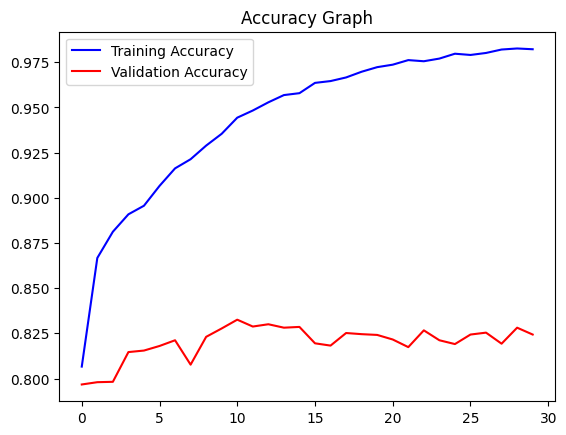

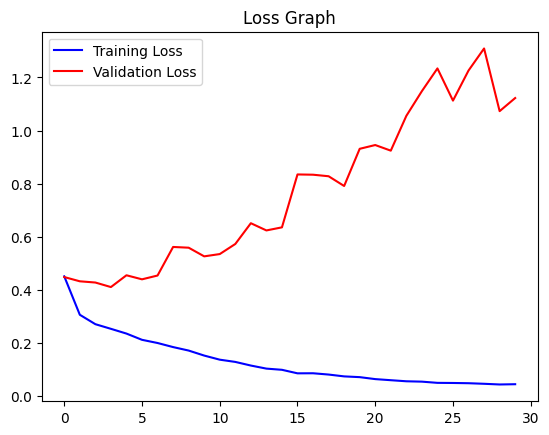

<Figure size 640x480 with 0 Axes>

In [33]:
cc = history.history['Gender_out_accuracy']
val_acc = history.history['val_Gender_out_accuracy']  # Corrected key
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')  # Corrected key
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

# Plotting Training and Validation Loss for the Gender output
plt.plot(epochs, history.history['Gender_out_loss'], 'b', label='Training Loss')  # Corrected key
plt.plot(epochs, history.history['val_Gender_out_loss'], 'r', label='Validation Loss')  # Corrected key
plt.title('Loss Graph')
plt.legend()
plt.figure()

plt.show()


## Prediction with Test Data

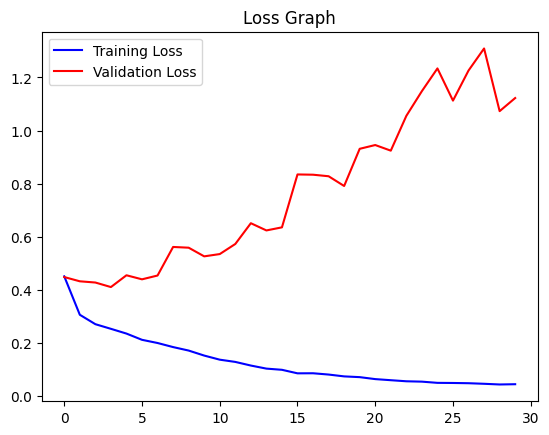

<Figure size 640x480 with 0 Axes>

In [35]:
loss = history.history['Age_out_loss']
val_acc = history.history['val_Age_out_loss']  # Corrected key
epochs = range(len(loss))


# Plotting Training and Validation Loss for the Gender output
plt.plot(epochs, history.history['Gender_out_loss'], 'b', label='Training Loss')  # Corrected key
plt.plot(epochs, history.history['val_Gender_out_loss'], 'r', label='Validation Loss')  # Corrected key
plt.title('Loss Graph')
plt.legend()
plt.figure()

plt.show()


Original Gender: Male Original Age: 10
1/1 [==============================] - 0s 85ms/step
Predicted Gender: Male Predicted Age: 11


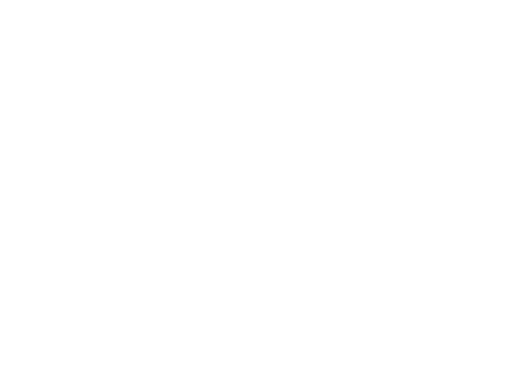

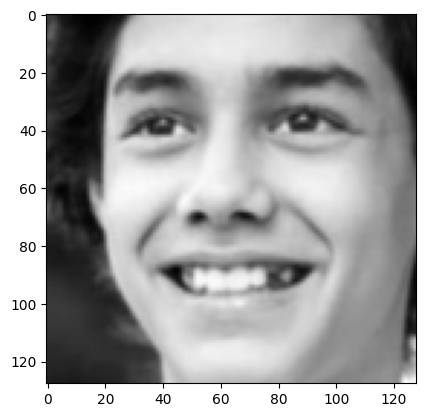

In [49]:
image_index = 100
gender_dict = {0: 'Male', 1: 'Female'}

# Replace 'y_gender_labels' and 'y_age_labels' with the actual variable names
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])

# predict from model
pred = model.predict(x[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)

plt.axis('off')
plt.show()
plt.imshow(x[image_index].reshape(128, 128), cmap='gray');


Original Gender: Female Original Age: 29
1/1 [==============================] - 0s 78ms/step
Predicted Gender: Female Predicted Age: 26


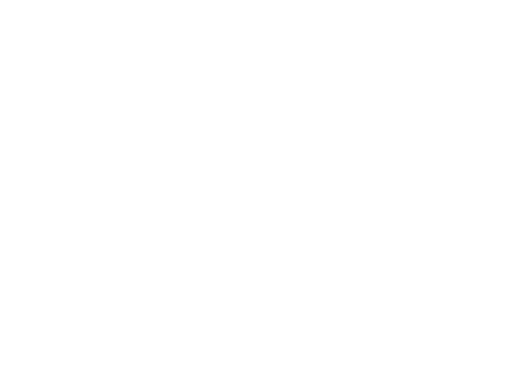

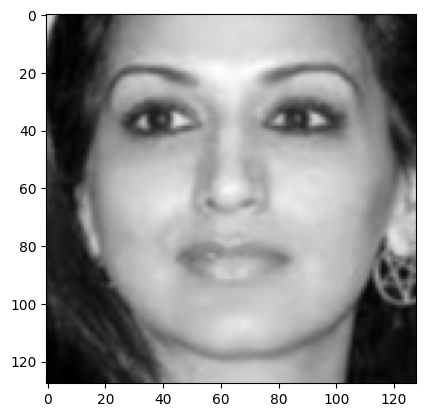

In [50]:
image_index = 10000
gender_dict = {0: 'Male', 1: 'Female'}

# Replace 'y_gender_labels' and 'y_age_labels' with the actual variable names
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])

# predict from model
pred = model.predict(x[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)

plt.axis('off')
plt.show()
plt.imshow(x[image_index].reshape(128, 128), cmap='gray');

Original Gender: Male Original Age: 34
1/1 [==============================] - 0s 74ms/step
Predicted Gender: Male Predicted Age: 31


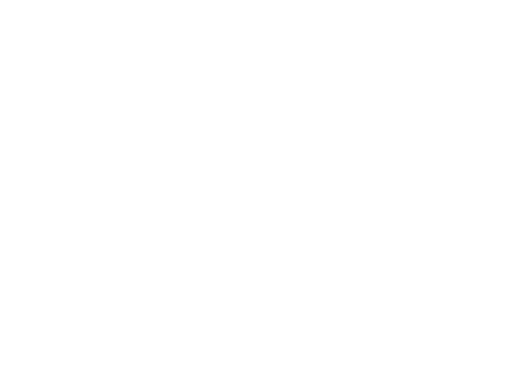

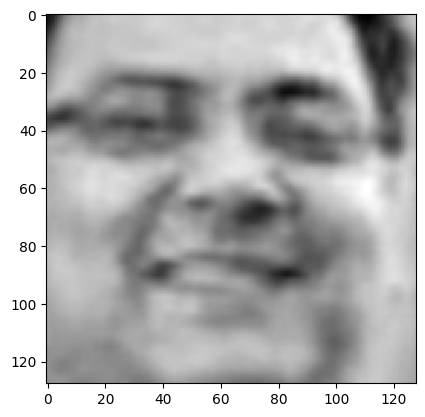

In [55]:
image_index = 12580
gender_dict = {0: 'Male', 1: 'Female'}

# Replace 'y_gender_labels' and 'y_age_labels' with the actual variable names
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])

# predict from model
pred = model.predict(x[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)

plt.axis('off')
plt.show()
plt.imshow(x[image_index].reshape(128, 128), cmap='gray');

Original Gender: Male Original Age: 10
1/1 [==============================] - 0s 109ms/step
Predicted Gender: Male Predicted Age: 12


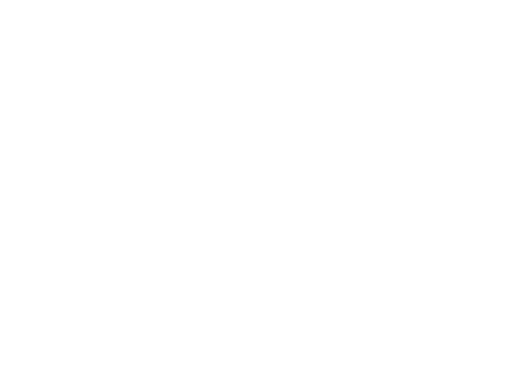

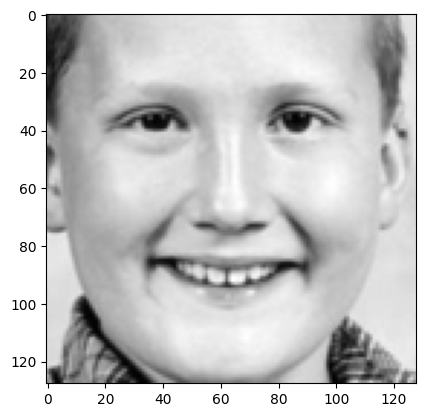

In [57]:
image_index = 20
gender_dict = {0: 'Male', 1: 'Female'}

# Replace 'y_gender_labels' and 'y_age_labels' with the actual variable names
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])

# predict from model
pred = model.predict(x[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)

plt.axis('off')
plt.show()
plt.imshow(x[image_index].reshape(128, 128), cmap='gray');

Original Gender: Male Original Age: 72
1/1 [==============================] - 0s 62ms/step
Predicted Gender: Male Predicted Age: 59


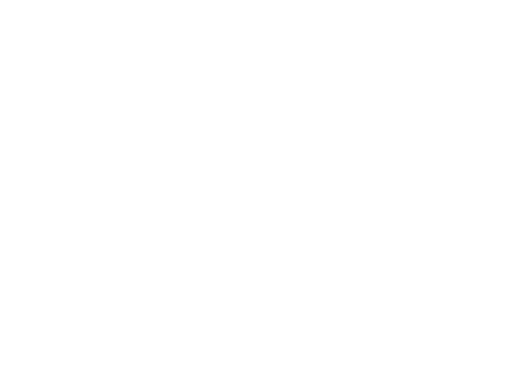

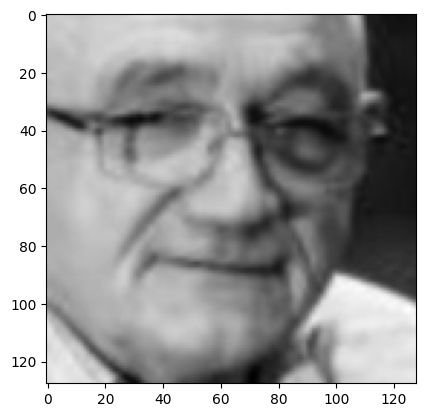

In [63]:
image_index = 22000
gender_dict = {0: 'Male', 1: 'Female'}

# Replace 'y_gender_labels' and 'y_age_labels' with the actual variable names
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])

# predict from model
pred = model.predict(x[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)

plt.axis('off')
plt.show()
plt.imshow(x[image_index].reshape(128, 128), cmap='gray');